各クラスを混合正規分布で近似して，事後確率を計算し，識別に利用

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn import mixture

In [2]:
# data = np.loadtxt("iris.dat",comments='#')
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target
target_names = iris.target_names

print('Size of the data = ', X.shape)

n = X.shape[0]
mdim = X.shape[1]

print(y)

X1 = X[y == 0,:]
X2 = X[y == 1,:]
X3 = X[y == 2,:]

Size of the data =  (150, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# fit a Gaussian Mixture Model with three components
clf1 = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf1.fit(X1)
clf2 = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf2.fit(X2)
clf3 = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf3.fit(X3)

#print(clf1.score_samples(X1))

# discriminant functions
G = np.zeros((n,3))
G[:,0] = clf1.score_samples(X)
G[:,1] = clf2.score_samples(X)
G[:,2] = clf3.score_samples(X)

print('G\n', G)

print('Arg_max\n', np.argmax(G, axis=1))

print('Confusion Matrix\n', confusion_matrix(y, np.argmax(G, axis=1)))

G
 [[ 7.48750607e-01 -1.28594070e+01 -1.32376282e+01]
 [ 1.52901019e-01 -7.18183935e+00 -5.96258091e+00]
 [ 1.18000431e-01 -1.36429018e+01 -9.97931138e+00]
 [ 5.20490322e-02 -1.24185568e+01 -9.12673430e+00]
 [ 4.22687847e-01 -1.71026644e+01 -1.64696926e+01]
 [-4.32945932e-01 -1.82513432e+01 -1.90189449e+01]
 [-5.10399210e-01 -2.02950863e+01 -1.45631449e+01]
 [ 1.38490698e+00 -1.23981888e+01 -1.18363565e+01]
 [-8.37800846e-01 -9.17448525e+00 -8.26309453e+00]
 [ 3.15312408e-01 -8.63598721e+00 -7.20804776e+00]
 [-8.47918886e-02 -1.28621385e+01 -1.40547884e+01]
 [-2.26185435e-01 -1.61809311e+01 -1.31486601e+01]
 [-4.21396776e-01 -8.44630491e+00 -6.54222347e+00]
 [-1.53539176e+00 -1.17918005e+01 -1.01288333e+01]
 [-1.88952963e+00 -1.55777625e+01 -1.67896999e+01]
 [-2.33128200e+00 -3.03013128e+01 -3.14412008e+01]
 [-4.32945932e-01 -1.82513432e+01 -1.90189449e+01]
 [ 7.48750607e-01 -1.28594070e+01 -1.32376282e+01]
 [-1.43447299e+00 -1.14939454e+01 -1.27464353e+01]
 [ 8.29223426e-01 -2.0721448

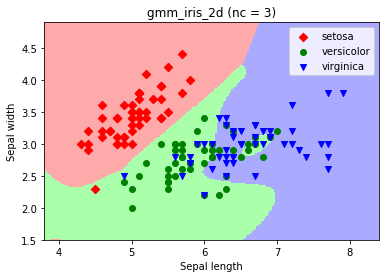

In [4]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## colors
colors = ['red', 'green', 'blue']
markers = ['D', 'o', 'v']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#####
Z=[]
G=np.zeros((3))
for Xvec in np.c_[xx.ravel(), yy.ravel()]:
#    print(X)
    Xp = np.array(Xvec, ndmin=2)
    G[0] = clf1.score_samples(Xp)
    G[1] = clf2.score_samples(Xp)
    G[2] = clf3.score_samples(Xp)
    Z.append(np.argmax(G))
Z=np.asarray(Z)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1, 2], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('gmm_iris_2d (nc = 3)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('gmm3_iris_2d.eps')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()

In [11]:
# fit a Gaussian Mixture Model with five components
clf1 = mixture.GaussianMixture(n_components=5, covariance_type='full')
clf1.fit(X1)
clf2 = mixture.GaussianMixture(n_components=5, covariance_type='full')
clf2.fit(X2)
clf3 = mixture.GaussianMixture(n_components=5, covariance_type='full')
clf3.fit(X3)

#print(clf1.score_samples(X1))

# discriminant functions
G = np.zeros((n,3))
G[:,0] = clf1.score_samples(X)
G[:,1] = clf2.score_samples(X)
G[:,2] = clf3.score_samples(X)

print('G\n', G)

print('Arg_max\n', np.argmax(G, axis=1))

print('Confusion Matrix\n', confusion_matrix(y, np.argmax(G, axis=1)))

G
 [[ 8.15556168e-01 -1.67432027e+01 -1.03228065e+01]
 [ 4.48971245e-01 -1.14609032e+01 -5.65370492e+00]
 [ 1.20818698e-01 -3.18379864e+01 -9.26086170e+00]
 [ 2.95719710e-01 -3.71854002e+01 -9.02806463e+00]
 [ 4.61871693e-01 -2.53194131e+01 -1.27750254e+01]
 [-2.52883982e-01 -1.94129118e+01 -1.04633848e+01]
 [-9.45366785e-01 -4.67766311e+01 -1.30323674e+01]
 [ 5.27145622e-01 -1.81095106e+01 -9.49835532e+00]
 [-8.69569550e-01 -5.06340286e+01 -9.13040110e+00]
 [ 6.90292258e-01 -1.41431959e+01 -6.53556071e+00]
 [-7.78762329e-01 -1.40836444e+01 -7.62248267e+00]
 [ 1.50095760e-01 -3.14918306e+01 -1.11487291e+01]
 [ 1.62417888e-01 -1.71555970e+01 -6.39894672e+00]
 [-4.48539927e-01 -5.73123787e+01 -1.09999198e+01]
 [-1.70314574e+00 -1.25754117e+01 -1.53239995e+01]
 [-2.36416557e+00 -2.47052337e+01 -2.79667768e+01]
 [-2.52883982e-01 -1.94129118e+01 -1.04633848e+01]
 [ 8.15556168e-01 -1.67432027e+01 -1.03228065e+01]
 [-1.89783307e+00 -1.01235263e+01 -7.67575914e+00]
 [-3.14530876e-01 -2.7395526

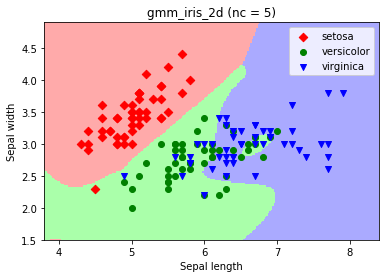

In [5]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## colors
colors = ['red', 'green', 'blue']
markers = ['D', 'o', 'v']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#####
Z=[]
G=np.zeros((3))
for Xvec in np.c_[xx.ravel(), yy.ravel()]:
#    print(X)
    Xp = np.array(Xvec, ndmin=2)
    G[0] = clf1.score_samples(Xp)
    G[1] = clf2.score_samples(Xp)
    G[2] = clf3.score_samples(Xp)
    Z.append(np.argmax(G))
Z=np.asarray(Z)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1, 2], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('gmm_iris_2d (nc = 5)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('gmm5_iris_2d.eps')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()